# Feature Engineering Booklet

#### Standard imports

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import missingno as msno
from numpy import random
import matplotlib.pyplot as plt

# Replacing NaN (or null) Values

In [3]:
df = pd.read_csv('train.csv')

#### Let's take a look at how many null values there are in each column.

It's seems `Age` and `Cabin` are the most commonly-null features.

We will focus on replacing null values for `Age`.

In [53]:
# Prints number of null values for each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Mean/Median Imputation

In [4]:
df['Age'].fillna((df['Age'].mean()), inplace=True)
df['Age'].fillna((df['Age'].median()), inplace=True)
print('Now Age has {} null values.'.format(df.isnull().sum()['Age']))

Now Age has 0 null values.


### Replacing with 0 or -1

In [5]:
df['Age'].fillna(value=0, inplace=True)

### Replacing with a random number. Random sampling imputation

In [6]:
df = pd.read_csv('train.csv')  # (reload the dataset to revert our changes)

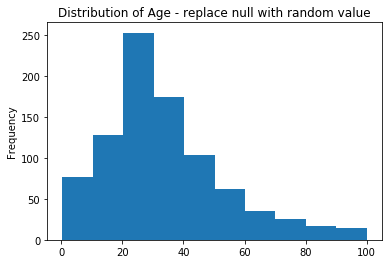

In [7]:
# We can replace age with a random numbers between 1 and 100 as follows
null_rows = df['Age'].isnull()
num_null_rows = sum(null_rows)
rand = random.randint(1, 101, size=num_null_rows)
df.loc[null_rows, 'Age'] = rand
df['Age'].plot.hist(title='Distribution of Age - replace null with random value')
plt.show()

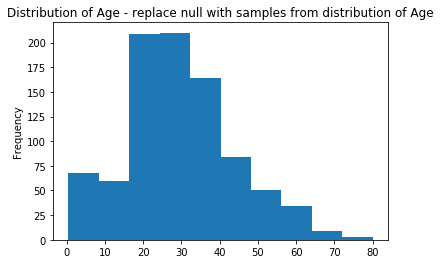

Note the lack of 100 year olds in the above plot compared to the previous plot.


In [8]:
# A smarter approach would be to replace Age with random samples from the non-null distribution of Age
# (as, with the previous approach, we would have generated just as many 99 year olds as 25 year olds).
df = pd.read_csv('train.csv')
rand = np.random.choice(df.loc[~null_rows, 'Age'], replace=True, size=num_null_rows)
df.loc[null_rows, 'Age'] = rand
df['Age'].plot.hist(title='Distribution of Age - replace null with samples from distribution of Age')
plt.show()
print('Note the lack of 100 year olds in the above plot compared to the previous plot.')

### Indicating Missingness

We could also use an additional 0/1 variable to indicate to our model when Age is missing

In [9]:
df = pd.read_csv('train.csv')

In [10]:
df['Age_Missing'] = np.where(df['Age'].isnull(), 1, 0)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [12]:
df['Age_Missing'].value_counts()

0    714
1    177
Name: Age_Missing, dtype: int64

### Imputation of NA by values at the end of the distribution

In [13]:
df['Age'].fillna(df.Age.mean() + df.Age.std() * 3, inplace=True)

In [14]:
df['Age'].value_counts()

73.27861    177
24.00000     30
22.00000     27
18.00000     26
28.00000     25
30.00000     25
19.00000     25
21.00000     24
25.00000     23
36.00000     22
29.00000     20
35.00000     18
26.00000     18
32.00000     18
27.00000     18
31.00000     17
16.00000     17
23.00000     15
34.00000     15
33.00000     15
20.00000     15
39.00000     14
40.00000     13
42.00000     13
17.00000     13
45.00000     12
38.00000     11
4.00000      10
50.00000     10
2.00000      10
           ... 
0.83000       2
30.50000      2
0.75000       2
57.00000      2
55.00000      2
70.00000      2
10.00000      2
32.50000      2
71.00000      2
63.00000      2
28.50000      2
45.50000      2
40.50000      2
59.00000      2
14.50000      1
0.67000       1
12.00000      1
0.92000       1
74.00000      1
34.50000      1
70.50000      1
36.50000      1
24.50000      1
66.00000      1
80.00000      1
55.50000      1
53.00000      1
20.50000      1
23.50000      1
0.42000       1
Name: Age, Length: 89, d

### Replacing with values of your choosing based on an assumption.

In [15]:
df['Age'].fillna(value='My Unique Value', inplace=True)

In [16]:
df['Age'].value_counts()

73.27861    177
24.00000     30
22.00000     27
18.00000     26
28.00000     25
30.00000     25
19.00000     25
21.00000     24
25.00000     23
36.00000     22
29.00000     20
35.00000     18
26.00000     18
32.00000     18
27.00000     18
31.00000     17
16.00000     17
23.00000     15
34.00000     15
33.00000     15
20.00000     15
39.00000     14
40.00000     13
42.00000     13
17.00000     13
45.00000     12
38.00000     11
4.00000      10
50.00000     10
2.00000      10
           ... 
0.83000       2
30.50000      2
0.75000       2
57.00000      2
55.00000      2
70.00000      2
10.00000      2
32.50000      2
71.00000      2
63.00000      2
28.50000      2
45.50000      2
40.50000      2
59.00000      2
14.50000      1
0.67000       1
12.00000      1
0.92000       1
74.00000      1
34.50000      1
70.50000      1
36.50000      1
24.50000      1
66.00000      1
80.00000      1
55.50000      1
53.00000      1
20.50000      1
23.50000      1
0.42000       1
Name: Age, Length: 89, d

### Using regression to impute attribute missing values

In [37]:
df = pd.read_csv('train.csv')

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
# We will use these variables to predict missing values for Age
# (we could use others, but would need to convert from text)
numeric_vars = ['Pclass', 'SibSp', 'Parch', 'Fare']
null_rows = df[numeric_vars + ['Age']].isnull().any(1)  # rows where Age or any feature var. is null

In [41]:
# Fit regression model to the non-null rows of data, predict the null rows
lr = LinearRegression()
lr.fit(df.loc[~null_rows, numeric_vars], df.loc[~null_rows, 'Age'])
df.loc[null_rows, 'Age'] = lr.predict(df.loc[null_rows, numeric_vars])

In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Feature Scaling

In [45]:
df = pd.read_csv('train.csv')

In [46]:
x = df[['Age']]
x.shape

(891, 1)

In [47]:
x.isnull().sum()

Age    177
dtype: int64

In [48]:
x['Age'].fillna(x['Age'].median(), inplace=True)

/Users/messodabeshera/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Standard Scaler

In [49]:
# This does the same thing as the following code (data - data.mean()) / data.std()
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

### MinMax Scaler

In [50]:
# This does the same as the following code (data – data.min()) / (data.max() – data.min())
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

### Robust Scaler

In [51]:
# This does (data - data.median()) / IQR) where IQR is inter-quartile range
from sklearn.preprocessing import RobustScaler
x = RobustScaler().fit_transform(x)

# Engineering Outliers in Numerical Variables

In [52]:
df = pd.read_csv('train.csv')

### Mean/median imputation or random sampling
If we have reasons to believe that the outliers are due to mechanical error or problems during measurement. This means, if the outliers are in nature similar to missing data, then any of the methods discussed for missing data can be applied to replace outliers. Because the number of outliers is in nature small (otherwise they would not be outliers), it is reasonable to use the mean/median imputation to replace them.

### Identify outliers with quantiles

In [53]:
q25 = df['Age'].quantile(0.25)
q75 = df['Age'].quantile(0.75)
IQR = q75 - q25
    
# Any value higher than ulimit or below llimit is an outlier
ulimit = q75 + 1.5*IQR
llimit = q25 - 1.5*IQR
print(ulimit, llimit, 'are the ulimit and llimit')
print('Imply Age outliers:')
df['Age'][np.bitwise_or(df['Age'] > ulimit, df['Age'] < llimit)]

64.8125 -6.6875 are the ulimit and llimit
Imply Age outliers:


33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

### Identify outliers with mean

In [54]:
# Using the mean and standard deviation to detect outliers should only be done with
# data that is not very skewed. Age is somewhat skewed so this could be an issue.
ulimit = np.mean(df['Age']) + 3 * np.std(df['Age'])
llimit = np.mean(df['Age']) - 3 * np.std(df['Age'])
ulimit, llimit

(73.24808109951077, -13.84984580539313)

### Discretization

In [57]:
# Re-read data and fill nulls with mean (could use other null-filling method)
df = pd.read_csv('train.csv')
not_null = ~df['Age'].isnull()

# Get the bin edges using np.histogram
num_bins = 10
_, bin_edges = np.histogram(df['Age'][not_null], bins=num_bins)

# Optionally create labels
# labels = ['Bin_{}'.format(i) for i in range(1, len(intervals))]
labels = [i for i in range(num_bins)]

# Create new feature with pd.cut
df['Discrete_Age'] = pd.cut(df['Age'], bins=bin_edges, labels=labels, include_lowest=True)

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Discrete_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


### Trimming

In [67]:
# Let's first remove any missing values
df['Age'].fillna((df['Age'].mean()), inplace=True)

In [68]:
# Get the outlier values
index_of_high_age = df[df.Age > 70].index

In [69]:
# Drop them
df = df.drop(index_of_high_age, axis=0)

### Winsorization (top coding bottom coding)

In [70]:
# Get the value of the 99th percentile
ulimit = np.percentile(df.Age.values, 99)

# Get the value of the 1st percentile (bottom 1%)
llimit = np.percentile(df.Age.values, 1)

# Create a copy of the age variable
df['Age_truncated'] = df.Age.copy()

# Replace all values above ulimit with value of ulimit
df.loc[df.Age > ulimit, 'Age_truncated'] = ulimit

# Replace all values below llimit with value of llimit
df.loc[df.Age < llimit, 'Age_truncated'] = llimit

### Rank Transformation (when the distances don’t matter so much)

In [71]:
from scipy.stats import rankdata
# This is like sorting the variable and then assigning an index starting from 1 to each value
rankdata(df['Age'], method='dense')

array([29, 53, 35, 49, 49, 40, 71,  7, 36, 19,  9, 76, 26, 54, 19, 72,  7,
       40, 43, 40, 49, 47, 21, 37, 13, 53, 40, 25, 40, 40, 55, 40, 40, 84,
       37, 58, 40, 28, 24, 19, 55, 36, 40,  8, 25, 40, 40, 40, 40, 24, 12,
       28, 66, 39, 83, 40, 28, 38, 10, 16, 29, 53, 61,  9, 40, 40, 39, 25,
       23, 35, 44, 22, 28, 35, 44, 34, 40, 40,  4, 41, 29, 39, 40, 37, 23,
       46, 22, 40, 30, 32, 39, 26, 63, 35, 77, 40, 30, 47, 47, 37, 40, 28,
       46, 52, 37, 28, 40, 53, 40, 64, 20, 29, 26, 23, 28, 39, 32,  7, 28,
       40, 45, 45, 71, 17, 40, 32, 40, 61, 46, 26, 64, 39, 34, 30, 25, 52,
       22, 32, 40, 29, 32, 25, 24, 25, 36, 14, 51, 58, 68, 29, 73, 56, 40,
       68, 22, 41, 40, 40, 60, 55, 35, 23,  6, 14, 40, 61, 40, 37, 79,  9,
        6, 28, 74, 24, 40, 67, 41, 50, 40, 40, 14,  6,  9, 40, 40, 61, 55,
       50, 44, 25, 25,  8, 60, 76, 40, 58, 40, 32, 37, 40, 47, 62, 24,  7,
       44, 35, 22, 55, 32, 49, 29, 41, 40, 43, 36, 58, 44, 41, 22, 36, 68,
       40, 53, 29, 25, 27

# Engineering Labels, Categorical Variables

In [136]:
df = pd.read_csv('train.csv')

In [137]:
df['Age'].fillna((df['Age'].median()), inplace=True)

In [138]:
x = df[['Age']]

In [139]:
x['Age'].nunique()

88

### One-Hot-Encoding and Pandas Get Dummies

In [131]:
from sklearn.preprocessing import OneHotEncoder
# One-hot encoding of the Gender variable using sklearn
one = OneHotEncoder(sparse=False).fit_transform(df[['Parch']])

In [132]:
onecol = pd.DataFrame(one)

In [133]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
onecol.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
results = pd.merge(onecol, df, left_index=True, right_index=True)

### Get Dummies

In [145]:
# Generally, pd.get_dummies is an easier approach to one-hot encoding
df_new = pd.get_dummies(data=df, columns=['Sex'])

In [146]:
df_new.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [147]:
# In models which use all features at once (most models apart from tree ensemble models, etc),
# it is wise to drop the first dummy variable, as it can be derived from the others
# (e.g. here we know if someone is Female based on whether they are Male, so we can drop Female)
df['Male'] = pd.get_dummies(df['Sex'], drop_first=True)

### Mean Encoding

We calculate the mean of the target variable for each class of the variable we wish to encode, and replace that variable by these means.

In [149]:
df = pd.read_csv('train.csv')
# Calculate the mean encoding
means_pclass = df[['Survived']].groupby(df['Pclass']).apply(np.mean)
means_pclass.columns = ['Mean Encoding']
means_pclass

,Mean Encoding
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [150]:
# Merge the encoding into our dataframe (by matching Pclass to the index of our prob. ratio dataframe)
df = pd.merge(df, means_pclass, left_on=df.Pclass, right_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mean Encoding
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.242363
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.242363
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.242363
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.242363
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.242363


### Probability Ratio Encoding

In [152]:
def probability_ratio(x):
    probability_eq_1 = np.mean(x)
    probability_eq_0 = 1.0 - probability_eq_1
    return probability_eq_1 / probability_eq_0

# Calculate the probability ratio encoding
prob_ratios_pclass = df[['Survived']].groupby(df['Pclass']).apply(lambda x: probability_ratio(x))
prob_ratios_pclass.columns = ['Prob Ratio Encoding']
prob_ratios_pclass

,Prob Ratio Encoding
Pclass,
1,1.700000
2,0.896907
3,0.319892


In [153]:
# Merge the encoding into our dataframe (by matching Pclass to the index of our prob. ratio dataframe)
df = pd.merge(df, prob_ratios_pclass, left_on=df.Pclass, right_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mean Encoding,Prob Ratio Encoding
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.242363,0.319892
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.242363,0.319892
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.242363,0.319892
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.242363,0.319892
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.242363,0.319892


### Weight of Evidence Encoding

In [155]:
def weight_of_evidence(x):
    probability_eq_1 = np.mean(x)
    probability_eq_0 = 1.0 - probability_eq_1
    return np.log(probability_eq_1 / probability_eq_0)

# Calculate the probability ratio encoding
woe_pclass = df[['Survived']].groupby(df['Pclass']).apply(lambda x: weight_of_evidence(x))
woe_pclass.columns = ['WOE Encoding']
woe_pclass

,WOE Encoding
Pclass,
1,0.530628
2,-0.108803
3,-1.139770


In [157]:
# again merge in and drop extra column
df = pd.merge(df, woe_pclass, left_on=df.Pclass, right_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mean Encoding,Prob Ratio Encoding,WOE Encoding_x,WOE Encoding_y
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.242363,0.319892,-1.13977,-1.13977
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.242363,0.319892,-1.13977,-1.13977
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.242363,0.319892,-1.13977,-1.13977
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.242363,0.319892,-1.13977,-1.13977
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.242363,0.319892,-1.13977,-1.13977


### Label Encoding

#### Cat.codes

In [158]:
# You can use cat.codes to convert the variable into a binary one
df['Sex'] = df['Sex'].astype('category')
# Cat.codes only works if the dtype is 'category'
df['Sex'].cat.codes.head()

0    1
2    0
4    1
5    1
7    1
dtype: int8

#### Factorize

Also achieves a similar end to `cat.codes`, but gives us the labels of each category.

In [213]:
df = pd.read_csv('train.csv')

In [220]:
label, val = pd.factorize(df['Sex'])
df['IsFemale'] = label

In [229]:
val.shape

(2,)

In [230]:
label.shape

(891,)

In [231]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Binary Encoding

In [167]:
# Can also use np.where to specify which values should be 1 or 0, as follows:
df['Sex_Binary'] = np.where(df['Sex'].isin(['Male','Female']), 1, 0)

# Engineering Dates

In [174]:
df = pd.read_csv('news_sample.csv')

In [175]:
time = pd.to_datetime(df['time'])

- Month
- Quarter
- Semester
- Day (number)
- Day of the week
- Is Weekend?
- Hr

In [177]:
# Pandas comes with packed with datetime properties which you could check out here: https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties
# You can even get a column with microseconds.
df['Month'] = time.dt.month
df['Day'] = time.dt.day
df['Hour'] = time.dt.hour
df['Minute'] = time.dt.minute
df['Seconds'] = time.dt.second

In [179]:
# Create is weekened column
df['is_weekend'] = np.where(df['Day'].isin([5,6]), 1, 0)

# Engineering Mixed Variables

We've seen that mixed variables are those which values contain both numbers and labels.

How can we engineer this type of variable to use it in machine learning?

What we need to do in these cases is extract the categorical part in one variable, and the numerical part in a different variable. Therefore, we obtain 2 variables from the original one.

There is not much to cover here besides giving one fake example

In [181]:
data = ['Apple', 'Banana', '2', '6']

lst_strings = []
lst_int = []

for i in data:
    if i == 'Apple':
        lst_strings.append(i)
    elif i == 'Banana':
        lst_strings.append(i)
    if i == '2':
        lst_int.append(int(i))
    elif i == '6':
        lst_int.append(int(i))

# Engineering Rare Labels in Categorical Variables

In [191]:
df = pd.read_csv('train.csv')

In [192]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

Lets say there is a small % of values within a large group of categories in a feature, you can grab them and call them "other" in order to reduce the values in the dataset and potentially reduce overfitting.

These observations can be re-categorised by:

- Replacing the rare label by most frequent label
- Grouping the observations that show rare labels into a unique category (with a new label like 'Rare', or 'Other')

### Replacing the rare label by most frequent label

In [193]:
val_counts = df['Age'].value_counts()
uncommon_ages = val_counts[val_counts<3].index.values
most_freq_age = val_counts.index[0]
df.loc[df['Age'].isin(uncommon_ages), 'Age'] = most_freq_age

### Grouping the observations that show rare labels into a unique category (with a new label like 'Rare', or 'Other')

In [195]:
val_counts = df['Age'].value_counts()
uncommon_ages = val_counts[val_counts<3].index.values
df.loc[:, 'Age_is_Rare'] = 0
df.loc[df['Age'].isin(uncommon_ages), 'Age_is_Rare'] = 1
df.loc[:, 'Age_is_Rare'].head()

0    0
1    0
2    0
3    0
4    0
Name: Age_is_Rare, dtype: int64

In [196]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Transforming Variables

Particularly for linear models, it can be useful to transform input features (or the target) prior to fitting the model, such that their distribution appears normal, or approximately normal (i.e. symmetric and bell-shaped).

### Gaussian Transformation

In [197]:
df = pd.read_csv('train.csv')

In [198]:
# Logarithmic transformation

In [199]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


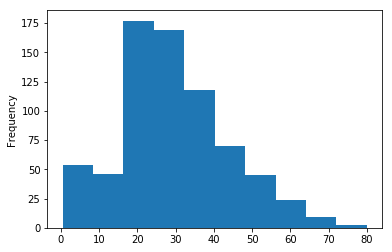

In [200]:
df['Age'].plot.hist()

In [201]:
df['Age Log'] = df['Age'].apply(np.log)

In [202]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348


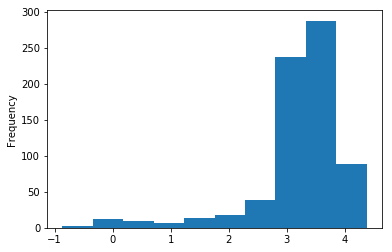

In [203]:
df['Age Log'].plot.hist()

### Reciprocal Transformation

In [204]:
df['Age Reciprocal'] = 1.0 / df['Age']

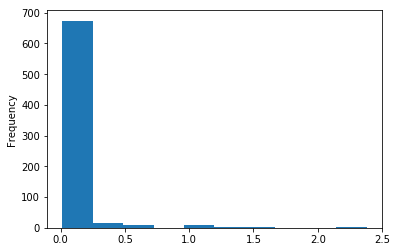

In [205]:
df['Age Reciprocal'].plot.hist()

### Square Root Transformation

In [206]:
df['Age Sqrt'] = np.sqrt(df['Age'])

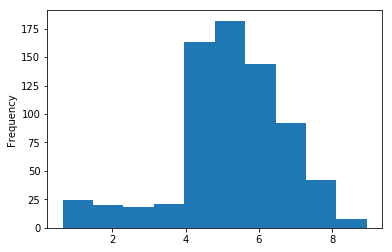

In [207]:
df['Age Sqrt'].plot.hist()

### Exponential Transformation 

In [208]:
df['Age Exp'] = np.exp(df['Age'])

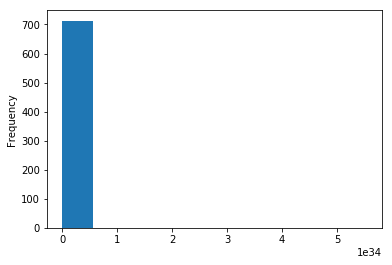

In [209]:
df['Age Exp'].plot.hist()

### Boxcox Transformation

/Users/messodabeshera/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1030: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


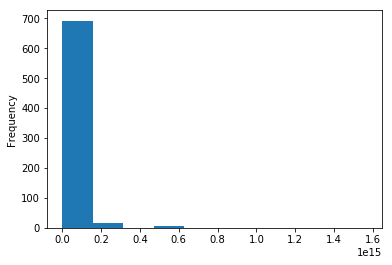

In [210]:
from scipy.stats import boxcox
df['Age BoxCox'] = boxcox(df['Age'])[0]
df['Age BoxCox'].plot.hist()

# Interaction Features

Perhaps, for example, older passengers who also paid a higher fare had a *particularly* high chance of not surviving on the Titanic. In such a case we would call that an *interaction* effect between `Age` and `Fare`. To help our model take account of this interaction effect, we can add a new variable `Age * Fare`.

In [211]:
df = pd.read_csv('train.csv')
df['Age_x_Fare'] = df['Age'] * df['Fare']

In [212]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_x_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,159.5000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2708.7654
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,206.0500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1858.5000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,281.7500


In [234]:
import compressdataframe

SyntaxError: invalid syntax (<ipython-input-234-c88acf9361b0>, line 1)